In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv
from graph_tiger.measures import run_measure
from graph_tiger.attacks import run_attack_method, get_attack_methods
from graph_tiger.graphs import graph_loader
from graph_tiger.cascading import Cascading
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
import graph_tiger
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

In [2]:
product_code = [i for i in range(270100, 271601)]
file_path = f'/Users/sunruogu/Desktop/Network_Attack/BACI_HS92_V202201/BACI_HS92_Y2020_V202201.csv'

In [3]:
def fun1(file_path):
    df = pd.read_csv(file_path)
    df = df[df["k"].isin(product_code)]
    for q in df["q"]:
        index = 0
        try:
            df.iloc[index, -1] = float(q.strip())
        except ValueError:
            df.iloc[index, -1] = 0
        index += 1
    return df

In [4]:
def fun2(df):
    df11 = df[['i', 'j', 'v']]
    # df12 = df[['i', 'j', 'q']]
    df21 = df11.groupby(['i', 'j'], as_index=False).sum()
    # df22 = df12.groupby(['i', 'j'], as_index=False).sum()
    # df21["q"] = df22["q"]
    df1 = df21
    return df1

In [5]:
def fun3(df1):
    df000=[]
    for i in np.array(df1["v"]):
        df000.append(i/sum(np.array(df1["v"])))
    df1["v"]=df000
    return df1

In [6]:
def plot(df1):
    G = nx.Graph()
    G = nx.from_pandas_edgelist(df1, 'i', "j", ["v"], create_using=nx.DiGraph())
    return G

In [7]:
df=fun1(file_path)
df1=fun2(df)
df1=fun3(df1)
G=plot(df1)

In [8]:
capacity=tuple(dict(nx.betweenness_centrality(G,normalized=True)).values())

In [13]:
params = {
   'runs': 20,
   'steps': 100,
   'seed': 1,

   'l': 1,
   # 'r': 0.2,
   # 'c': int(0.1 * len(G)),
   #  'c': tuple(dict(nx.betweenness_centrality(G,normalized=True)).values()),

   'k_a': 10,
   'attack': 'rb_node',
   'attack_approx': int(0.1 * len(G)),

   'k_d': 0,
   'defense': None,

   'robust_measure': 'spectral_radius',

   'plot_graph_transition': True,  # False turns off key simulation image "snapshots"
   'gif_animation': False,  # True creaets a video of the simulation (MP4 file)
   'gif_snaps': True,  # True saves each frame of the simulation as an image

   'edge_style': 'bundled',
   'node_style': 'force_atlas',
   'fa_iter': 2000,
}

In [14]:
def get_results():
    global params
    result_list=[]
    for load in [0.7,0.8,0.9,1.0]:
        print(1)
        params["l"]=load
        cascading = Cascading(G, **params)
        print(2)
        results = cascading.run_simulation()
        print(3)
        result_list.append(results)
        print(4)
    return result_list

In [15]:
get_results()

1


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


2
Running simulation 20 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


3
4
1
2
Running simulation 20 times
3
4
1
2
Running simulation 20 times
3
4
1
2
Running simulation 20 times
3
4


[[73.2155,
  59.67100000000001,
  58.2965,
  59.1795,
  59.206,
  58.555499999999995,
  57.882000000000005,
  58.631499999999996,
  58.74550000000001,
  57.98599999999999,
  58.1725,
  57.7505,
  56.477,
  54.84849999999999,
  48.6925,
  43.003499999999995,
  30.9795,
  9.099000000000002,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [74.08200000000002,
  58.891999999999996,
  58.445499999999996,
  58.601,
  58.611000000000004,
  57.81849999999999,
  58.983500000000

In [16]:
def plot_results(graph, xlabel='Steps', line_label='', experiment=''):
    plt.figure(figsize=(6.4, 4.8),frameon=False)

    # title = '{}:step={},l={},r={},k_a={},attack={},k_d={},defense={}'.format(experiment, params['steps'], params['l'], params['r'], params['k_a'],
    #                                                                               params['attack'], params['k_d'], params['defense'])

    title="Cascading Failure in Different Initial Load"

    result_list=get_results()
    result_norm_list=[]
    for res in result_list:
        key=[i for i in range(len(res))]
        d=zip(key,res)
        d=dict(d)

        for strength, result in d.items():
            result_norm = [r / len(graph) for r in res]
        result_norm_list.append(result_norm)
    # print(len(result_norm_list))
    # print(result_norm_list)
    plt.plot(result_norm_list[0], label="{}: {}".format(line_label, strength),linestyle='-')
    plt.plot(result_norm_list[1], label="{}: {}".format(line_label, strength),linestyle='--')
    plt.plot(result_norm_list[2], label="{}: {}".format(line_label, strength),linestyle='-.')
    plt.plot(result_norm_list[3], label="{}: {}".format(line_label, strength),linestyle=':')
    # plt.plot(result_norm_list[4], label="{}: {}".format(line_label, strength),linestyle='-')

    plt.xlabel(xlabel)
    plt.ylabel("Spectral Radius")
    plt.ylim(0, 0.3)
    plt.xlim(0,40)

    save_dir = os.getcwd() + '/plots/' + experiment + '/'
    os.makedirs(save_dir, exist_ok=True)

    plt.legend(["initial load: 0.7","initial load: 0.8","initial load: 0.9","initial load: 1.0",],loc='lower right')
    # plt.title(title)
    plt.savefig(save_dir + title + '.pdf')
    plt.show()
    plt.clf()

1
2
Running simulation 20 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


3
4
1
2
Running simulation 20 times
3
4
1
2
Running simulation 20 times
3
4
1
2
Running simulation 20 times
3
4


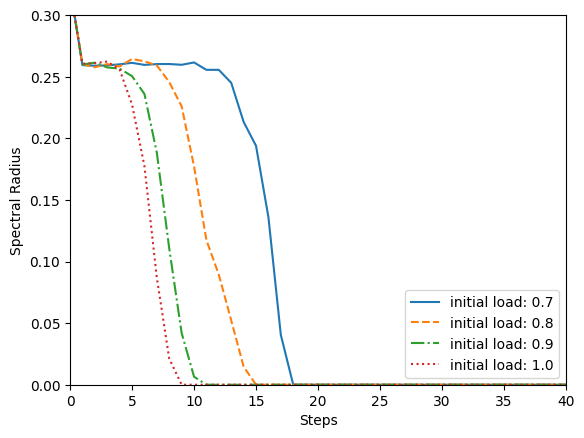

<Figure size 640x480 with 0 Axes>

In [17]:
plot_results(G)